<a href="https://colab.research.google.com/github/anagjurchinova/DataScience_2025/blob/main/YAHOO-FINANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [1]:
pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 15.2 MB/s eta 0:00:00


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

# Configuration

In [3]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [4]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [42]:
# Navigate to a web page.
baseurl = 'https://finance.yahoo.com/crypto'
browser.get(baseurl)

In [6]:
# Print the page source code.
print(browser.page_source)

<html lang="en-US" theme="light" data-color-scheme="light" class="desktop neo-green dock-upscale"><head><script type="text/javascript" async="" src="https://static.criteo.net/js/ld/publishertag.prebid.144.js"></script><script charset="UTF-8" type="text/javascript" async="async" src="https://cdn.taboola.com/libtrc/google-topics-api.20241104-8-RELEASE.es6.js"></script><script charset="UTF-8" type="text/javascript" src="https://cdn.taboola.com/libtrc/impl.20241104-8-RELEASE.js"></script><script type="text/javascript" src="//gum.criteo.com/sync?c=72&amp;r=2&amp;j=TRC.getRTUS&amp;us_privacy=1YNN&amp;gdpr=0&amp;gdpr_consent=&amp;gdpr_pd="></script><script type="text/javascript" async="" src="//pm-widget.taboola.com/yahooweb-network/load.js"></script>
        <meta charset="utf-8">
        <meta name="oath:guce:consent-host" content="guce.yahoo.com">
        <link rel="preconnect" href="//s.yimg.com" crossorigin="anonymous"><link rel="preconnect" href="//geo.yahoo.com"><link rel="preconnect" 

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://finance.yahoo.com/crypto. The task includes the extraction of **Cryptocurrency names** and their **price** and **market cap**. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of the prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [30]:
# Write your code here.
crypto_currencies = browser.find_element(By.XPATH, '//*[@id="nimbus-app"]/section/section/section')
names = crypto_currencies.find_elements(By.CLASS_NAME, 'yf-h8l7j7')
prices = crypto_currencies.find_elements(By.CSS_SELECTOR, 'td:nth-child(4) > span > fin-streamer')
market_caps = crypto_currencies.find_elements(By.CSS_SELECTOR, 'td:nth-child(7) > span > fin-streamer')

data = []

for name, price, mc in zip(names, prices, market_caps):
  data.append([name.text, price.text, mc.text])

df = pd.DataFrame(data, columns=('Currency Name', 'Price', 'Market Cap'))
df

,Currency Name,Price,Market Cap
0,Bitcoin USD,"68,850.19",1.362T
1,Ethereum USD,"2,440.50",293.878B
2,Tether USDt USD,0.999585,120.447B
3,BNB USD,560.38,80.75B
4,Solana USD,162.33,76.443B
5,USD Coin USD,1.0001,35.12B
6,XRP USD,0.511592,29.094B
7,Dogecoin USD,0.167617,24.583B
8,Lido Staked ETH USD,"2,437.46",23.774B
9,Wrapped TRON USD,0.162217,14.182B


In [33]:
# Add as many code boxes as you need.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Currency Name  25 non-null     object
 1   Price          25 non-null     object
 2   Market Cap     25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


In [38]:
df['Market Cap'] = df['Market Cap'].str.replace(r'[TBM]$', '', regex=True)
df['Market Cap'] = df['Market Cap'].astype(float)
df['Price'] = df['Price'].str.replace(',', '').astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Currency Name  25 non-null     object 
 1   Price          25 non-null     float64
 2   Market Cap     25 non-null     float64
dtypes: float64(2), object(1)
memory usage: 728.0+ bytes


# Laboratory Exercise - Bonus Task (+ 2 points)

The additional task involves clicking on the symbol for BTC-USD and on the new page that appears click on the **Historical data**. You will extract the prices and market caps for the BTC-USD only, and make line plot for the price data.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

In [47]:
# Write your code here.
if(browser.current_url != baseurl):
  browser.get(baseurl)

element = browser.find_element(By.CSS_SELECTOR, 'td:nth-child(1) > span > div > a > div > span') # LOOKS FOR THE BTC-USD ELEMENT AND CLICKS IT
element.click()

historical_data = browser.find_element(By.CSS_SELECTOR, "section > section > aside > section > nav > ul > li:nth-child(5) > a > span")
historical_data.click()

print(browser.current_url)


https://finance.yahoo.com/quote/BTC-USD/history/


In [54]:
# Add as many code boxes as you need.
btc_rows = browser.find_elements(By.CSS_SELECTOR, "table.table tbody tr")

data = []
for row in btc_rows:
    cells = row.find_elements(By.CSS_SELECTOR, "td")
    close = cells[4].text
    volume = cells[6].text
    data.append([close, volume])

tmp_df = pd.DataFrame(data, columns=['Close', 'Volume'])
tmp_df


,Close,Volume
0,"68,721.16","41,881,100,288"
1,"67,811.51","41,184,819,348"
2,"68,741.12","34,868,307,655"
3,"69,289.27","18,184,612,091"
4,"69,482.47","49,989,795,365"
...,...,...
362,"36,693.13","37,762,672,382"
363,"35,655.28","17,295,394,918"
364,"35,443.56","18,834,737,789"
365,"35,037.37","12,693,436,420"


In [55]:
df = tmp_df.copy()
df['Close'] = df['Close'].str.replace(',', '').astype(float)
df['Volume'] = df['Volume'].str.replace(',','').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   367 non-null    float64
 1   Volume  367 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


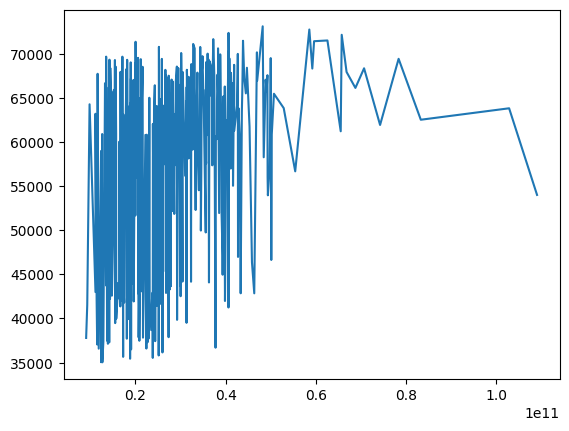

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = df.sort_values('Volume')
grouped_by_volume = df.groupby('Volume')['Close'].mean()
plt.plot(grouped_by_volume)
plt.show()